In [1]:
''' Imports ''' 
import os,json 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
train_data = []

with open("./data/CSAbstruct/train.jsonl", "r") as in_file:
    lines = in_file.readlines()
    for line in lines:
        train_data.append(json.loads(line))
        
print(len(train_data))

1668


In [3]:
conf_labels = {
    "background": "BAC",
    "objective": "OBJ",
    "method": "APP",
    "result": "OUT",
    "other": "OTH"
}

order = list(conf_labels.values())
print(order)

['BAC', 'OBJ', 'APP', 'OUT', 'OTH']


In [4]:
abs_df = pd.DataFrame()

def get_normalise_denom(size):
    if size == 1:
        return size
    else:
        return size-1

article_ids = []
abs_labels = []
abs_sents_position = []
abs_sents_position_normalised = []

for i, inst in enumerate(train_data):
    abs_label_list = inst['labels']
    abs_labels.extend([conf_labels[l] for l in abs_label_list])
    article_ids.extend([i]*len(abs_label_list))
    positions = [x[0] for x in enumerate(abs_label_list)]
    abs_sents_position.extend(positions)
    abs_sents_position_normalised.extend([x/get_normalise_denom(len(positions)) for x in positions])
    
abs_df['article_id'] = article_ids
abs_df['label'] = abs_labels
abs_df['position'] = abs_sents_position
abs_df['norm_position'] = abs_sents_position_normalised


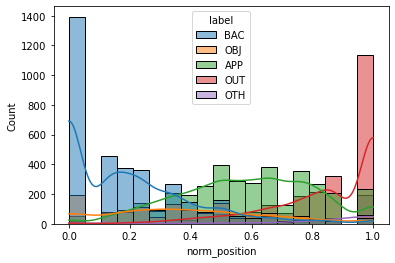

In [5]:
plot = sns.histplot(data=abs_df, x="norm_position", hue="label", kde=True)
fig = plot.get_figure()
# fig.savefig(f'./abstract_discourse_csabstruct.png', dpi=300)

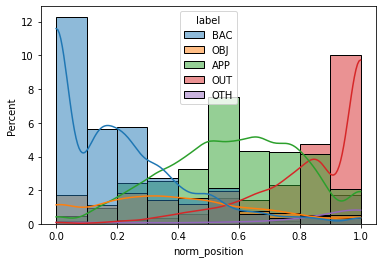

In [6]:
plot = sns.histplot(data=abs_df, x="norm_position", hue="label", hue_order=order, kde=True, stat="percent", bins=10)
fig = plot.get_figure()

In [7]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, bbox_to_anchor=(1.02, 1), borderaxespad=0, title=title, **kws)

In [1]:
plot = sns.histplot(data=abs_df, x="norm_position", hue="label", hue_order=order, \
                    kde=True, stat="proportion", bins=10,  element="step")
move_legend(plot.fig, "upper left")
plot.set(ylabel='')
plot.set(xlabel='')
plt.ylim(0, 0.15)
fig = plot.get_figure()
fig.savefig(f'./abstract_discourse_csabstruct.png', dpi=300, bbox_inches='tight')

NameError: name 'sns' is not defined